In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [60]:
##Read in and assign column names to the German Credit Dataset
df = pd.read_csv(r"C:\Users\Ben\Downloads\statlog+german+credit+data\german.data", header=None
                   , delim_whitespace=True)
df.columns = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
              'savings_account', 'employment', 'installment_rate', 'personal_status_sex', 'debtors_guarantors', 'present_residence', 
              'property', 'age', 'other_installment_plans', 'housing', 'number_credits',
              'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

C:\Users\Ben\AppData\Local\Temp\ipykernel_13064\1737278401.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r"C:\Users\Ben\Downloads\statlog+german+credit+data\german.data", header=None


In [61]:
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status_sex,debtors_guarantors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Negative: 274 (27.40%)
0 to 200: 269 (26.90%)
200 plus: 63 (6.30%)
None: 394 (39.40%)


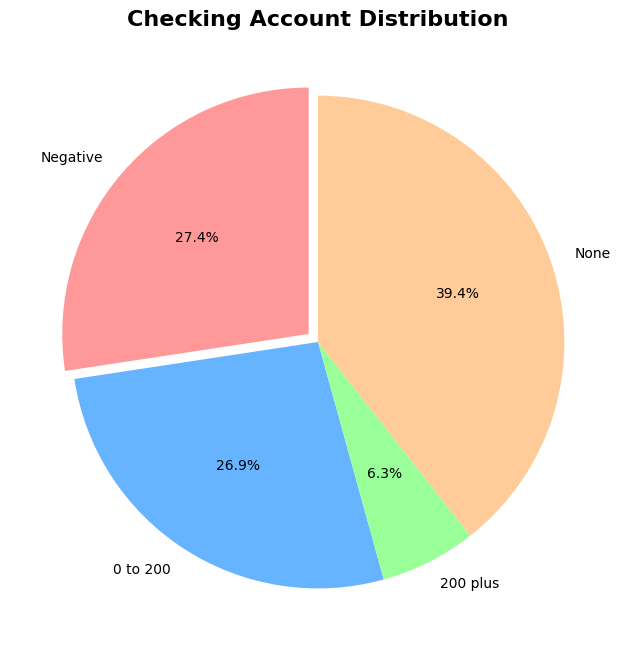

In [62]:
#checking distribution and pie chart
neg = len(df[df['checking_account'] == 'A11'])
low = len(df[df['checking_account'] == 'A12'])
high = len(df[df['checking_account'] == 'A13'])
none = len(df[df['checking_account'] == 'A14'])

total = len(df)
print(f"Negative: {neg} ({(neg/total)*100:.2f}%)")
print(f"0 to 200: {low} ({(low/total)*100:.2f}%)")
print(f"200 plus: {high} ({(high/total)*100:.2f}%)")
print(f"None: {none} ({(none/total)*100:.2f}%)")

counts = [neg, low, high, none]
labels = ['Negative', '0 to 200', '200 plus', 'None']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, 
        startangle=90, explode=(0.05, 0, 0, 0))  # Slightly separate first slice
plt.title('Checking Account Distribution', fontsize=16, fontweight='bold')
plt.show()



In [63]:
##Assigning numerical values to categorical variables for analysis

# Attribute 4: Purpose
# Reference: A410 (others) - catch-all category as baseline
purpose_dummies = pd.get_dummies(df['purpose'], prefix='purpose')
purpose_dummies = purpose_dummies.drop('purpose_A410', axis=1)
purpose_dummies = purpose_dummies.rename(columns = {
    'purpose_A40': 'car_new',
    'purpose_A41': 'car_used',
    'purpose_A42': 'furniture',
    'purpose_A43': 'radio_tv',
    'purpose_A44': 'appliances',
    'purpose_A45': 'repairs',
    'purpose_A46': 'education',
    'purpose_A48': 'retraining',
    'purpose_A49': 'business'
})
#checked

# Attribute 9: Personal status and sex
# Reference: A93 (male, single) - most common category as baseline
personal_dummies = pd.get_dummies(df['personal_status_sex'], prefix='personal')
personal_dummies = personal_dummies.drop('personal_A93', axis=1)
personal_dummies = personal_dummies.rename(columns = {
    'personal_A91': 'male_divorced',
    'personal_A92': 'female_divorced',
    'personal_A94': 'male_married',
    'personal_A95': 'female_single'
})

# Attribute 10: Other debtors/guarantors
# Reference: A101 (none) - most common/neutral baseline
debtors_dummies = pd.get_dummies(df['debtors_guarantors'], prefix='debtors')
debtors_dummies = debtors_dummies.drop('debtors_A101', axis=1)
debtors_dummies = debtors_dummies.rename(columns = {
    'debtors_A102': 'coapplicant',
    'debtors_A103': 'guarantor'
})

# Attribute 12: Property
# Reference: A124 (no property) - worst property status as baseline
property_dummies = pd.get_dummies(df['property'], prefix='property')
property_dummies = property_dummies.drop('property_A124', axis=1)
property_dummies = property_dummies.rename(columns = {
    'property_A121': 'real_estate',
    'property_A122': 'insurance',
    'property_A123': 'car'
})

# Attribute 14: Other installment plans
# Reference: A143 (none) - most common baseline
installment_dummies = pd.get_dummies(df['other_installment_plans'], prefix='installment')
installment_dummies = installment_dummies.drop('installment_A143', axis=1)
installment_dummies = installment_dummies.rename(columns = {
    'installment_A141': 'installment_bank',
    'installment_A142': 'installment_stores'
})

# Attribute 17: Job
# Reference: A171 (unemployed/unskilled non-resident) - worst job status as baseline
job_dummies = pd.get_dummies(df['job'], prefix='job')
job_dummies = job_dummies.drop('job_A171', axis=1)
job_dummies = job_dummies.rename(columns = {
    'job_A172': 'job_unskilled',
    'job_A173': 'job_skilled',
    'job_A174': 'job_management'
})

# Attribute 19: Telephone
# Reference: A191 (no telephone) - baseline for no phone
telephone_dummies = pd.get_dummies(df['telephone'], prefix='telephone')
telephone_dummies = telephone_dummies.drop('telephone_A191', axis=1)
telephone_dummies = telephone_dummies.rename(columns = {
    'telephone_A192': 'telephone_yes'
})

# Attribute 20: Foreign worker
# Reference: A202 (not foreign) - majority category as baseline
foreign_dummies = pd.get_dummies(df['foreign_worker'], prefix='foreign')
foreign_dummies = foreign_dummies.drop('foreign_A202', axis=1)
foreign_dummies = foreign_dummies.rename(columns = {
    'foreign_A201': 'foreign_yes'
})

In [64]:
##Combine all the dummy variables with the original dataframe
df_encoded = pd.concat([df, purpose_dummies, 
                        personal_dummies, debtors_dummies, property_dummies, installment_dummies, 
                        job_dummies, telephone_dummies, foreign_dummies], axis=1)  
df_encoded.drop(columns=['purpose',
                         'personal_status_sex', 'debtors_guarantors', 'property', 'other_installment_plans',
                         'job', 'telephone', 'foreign_worker'], inplace=True)

In [65]:
#creates numeric values for checking, credit history, savings, employment, and housing (values that I felt had an inherent order)
dfg = df_encoded.copy()

mapping_checking = {'A14': 0, 'A11': 1, 'A12': 2, 'A13': 3}
dfg['checking_account'] = dfg['checking_account'].map(mapping_checking)

mapping_credit = {'A34': 0, 'A33': 1, 'A32': 2, 'A31': 3, 'A30': 4}
dfg['credit_history'] = dfg['credit_history'].map(mapping_credit)

mapping_savings = {'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5}
dfg['savings_account'] = dfg['savings_account'].map(mapping_savings)

mapping_employment = {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
dfg['employment'] = dfg['employment'].map(mapping_employment)

mapping_housing = {'A151': 0, 'A152': 1, 'A153': 2}
dfg['housing'] = dfg['housing'].map(mapping_housing)



In [66]:
null = df_encoded.isnull().sum()
null

checking_account      0
duration              0
credit_history        0
credit_amount         0
savings_account       0
employment            0
installment_rate      0
present_residence     0
age                   0
housing               0
number_credits        0
people_liable         0
credit_risk           0
car_new               0
car_used              0
furniture             0
radio_tv              0
appliances            0
repairs               0
education             0
retraining            0
business              0
male_divorced         0
female_divorced       0
male_married          0
coapplicant           0
guarantor             0
real_estate           0
insurance             0
car                   0
installment_bank      0
installment_stores    0
job_unskilled         0
job_skilled           0
job_management        0
telephone_yes         0
foreign_yes           0
dtype: int64

In [67]:
duplicates = df_encoded.duplicated().sum()
print(duplicates)

0


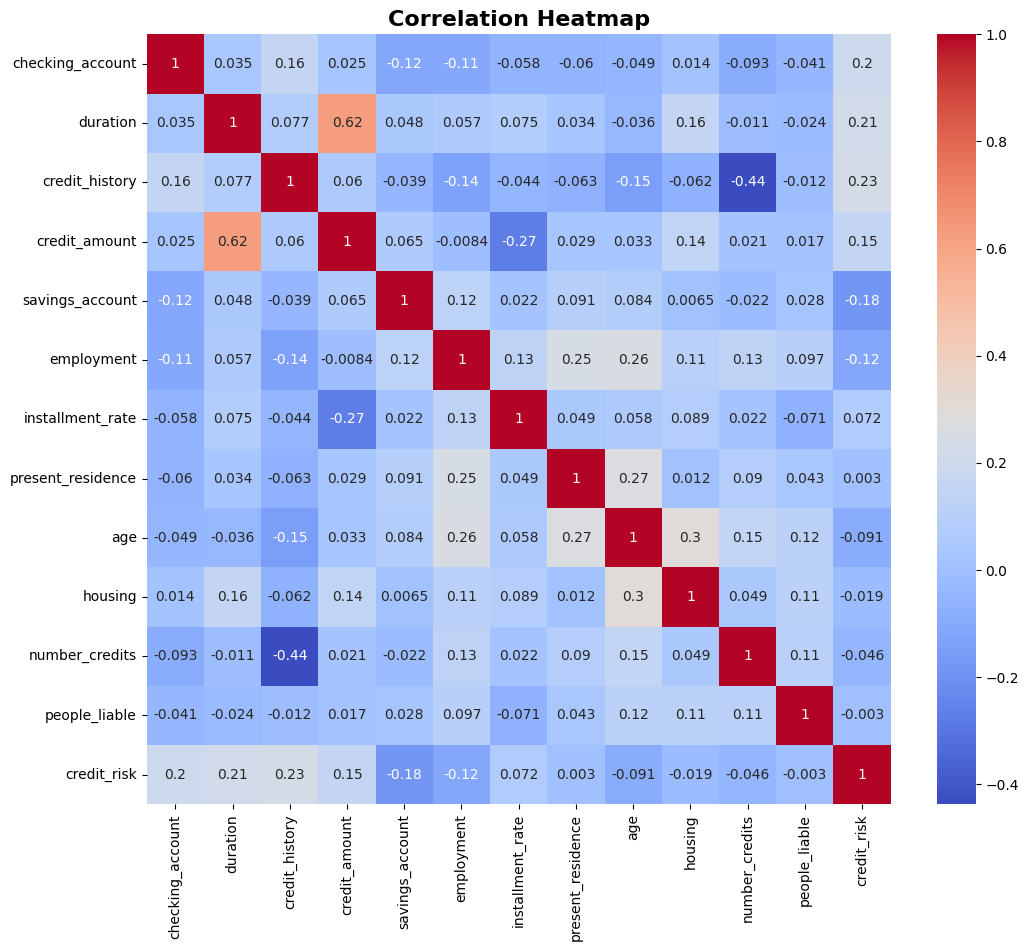

In [68]:
numerical_df = dfg.select_dtypes(include=[np.number])

correlation = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

##Strong correlation
##   Credit amount and duration (0.62)
##Moderate correlation
##   Num of Credits and Credit History (-0.44)

In [69]:
dfg['credit_risk'].value_counts()


credit_risk
1    700
2    300
Name: count, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
#define features(X) and target variable(y)
X = dfg.drop('credit_risk', axis=1)
y = dfg['credit_risk']


In [72]:
#Model creation and testing. Cost matrix to penalize certain misclassifications more than others

##splits data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
classifier = RandomForestClassifier(
    ##class_weight={1:1, 2:5},  # Example weights: misclassifying class 2 is 5 times more costly
    random_state=42
)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

cost_matrix = np.array([
    [0, 1],  # Actual class 1: cost of predicting class 1 is 0, class 2 is 1
    [5, 0]   # Actual class 2: cost of predicting class 1 is 5, class 2 is 0
])
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate total cost
total_cost = np.sum(cm * cost_matrix)
print(f"\nTotal Cost: {total_cost}")

# Calculate average cost per prediction
avg_cost = total_cost / len(y_test)
print(f"Average Cost per Prediction: {avg_cost:.4f}")

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[[130  11]
 [ 34  25]]

Total Cost: 181
Average Cost per Prediction: 0.9050
Accuracy: 0.7750


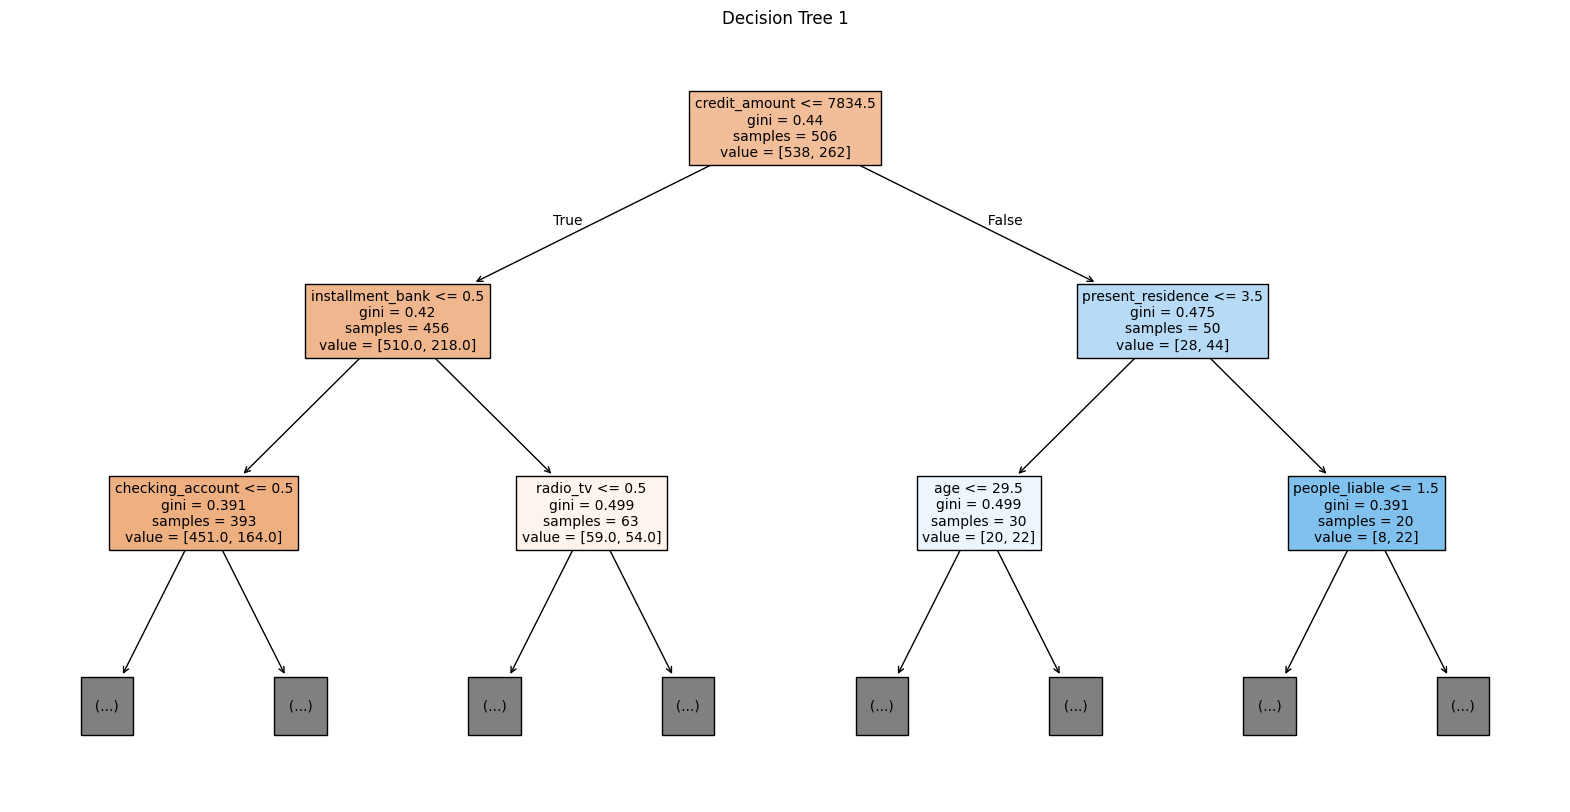

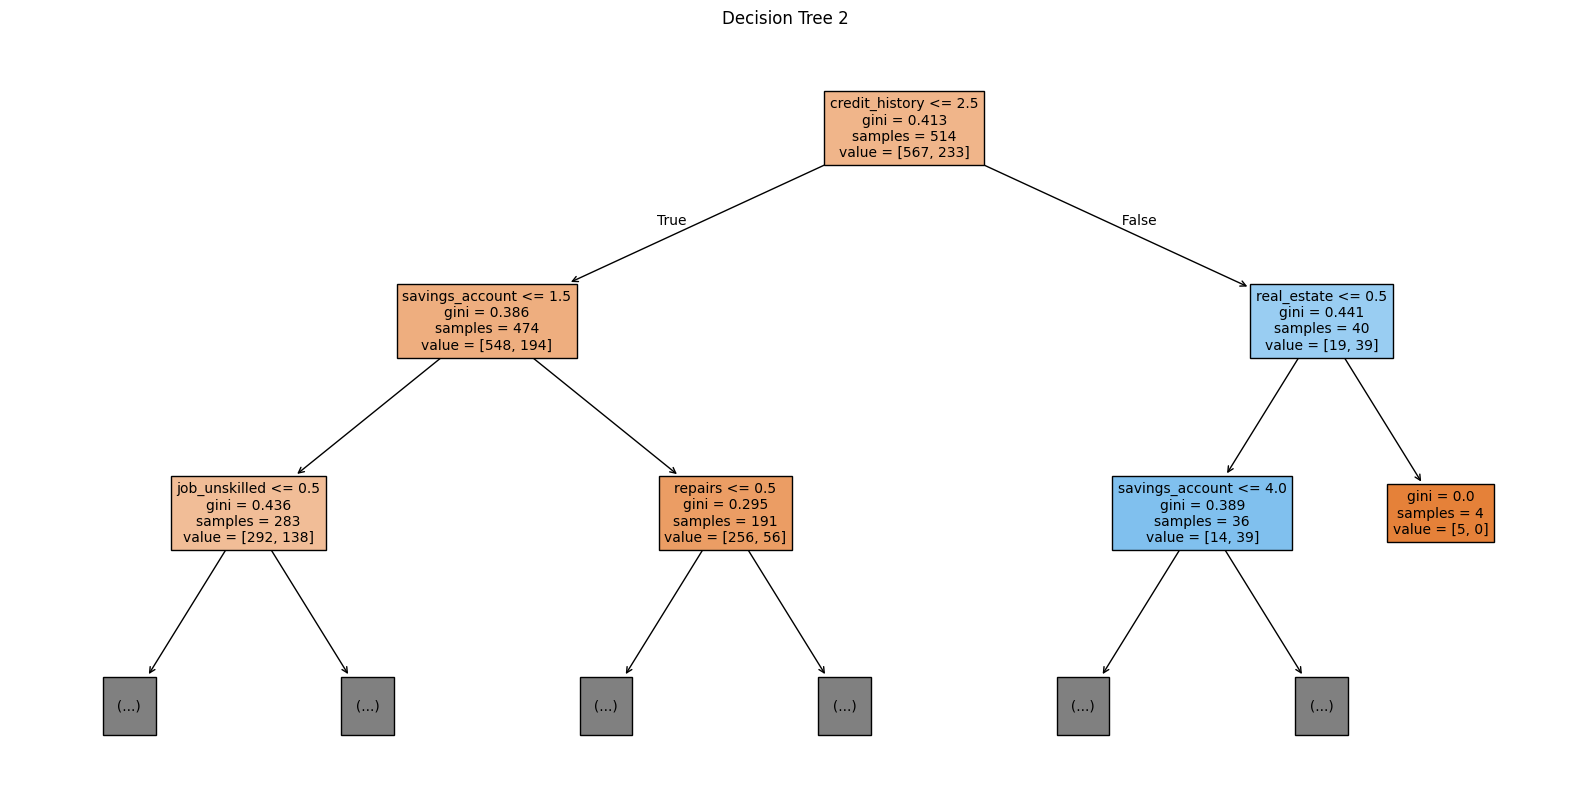

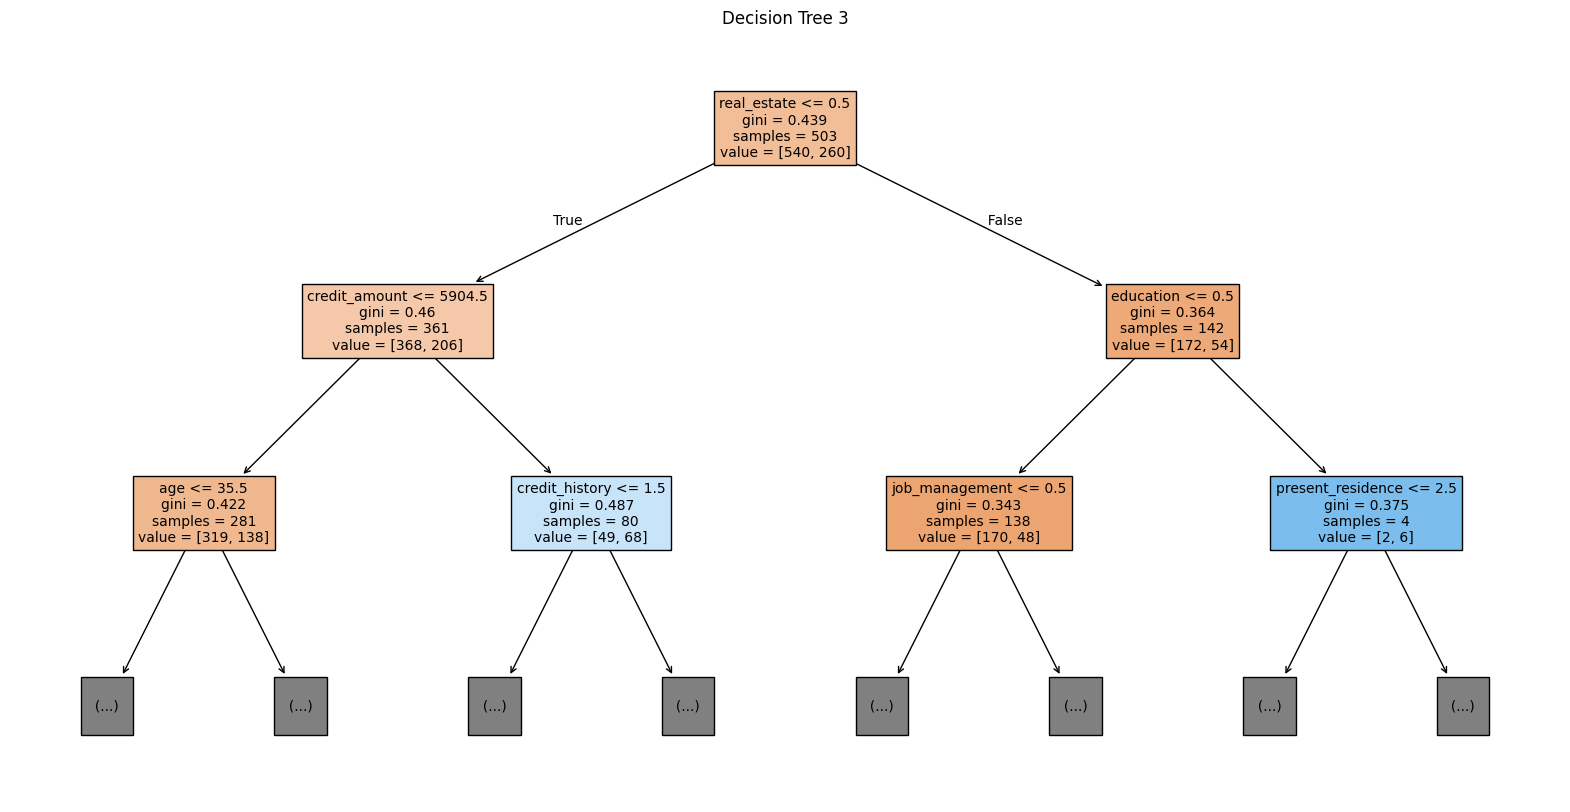

In [73]:
# Export the first three decision trees from the forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize first 3 trees from your Random Forest
for i in range(3):
    tree = classifier.estimators_[i]
    
    plt.figure(figsize=(20, 10))
    plot_tree(tree, 
              feature_names=X_train.columns,
              filled=True,
              max_depth=2,
              fontsize=10)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42
)

rand_search.fit(X_train, y_train)

# NOW you can get the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 485}


In [ ]:
# Builds model with best hyperparameters found above
classifierBH = RandomForestClassifier(
    class_weight={1: 1, 2: 5},
    max_depth=14,
    min_samples_leaf=2,
    min_samples_split=7,
    n_estimators=485,
    random_state=42
)
classifierBH.fit(X_train, y_train)
# Make predictions
y_pred = classifierBH.predict(X_test)

cost_matrix = np.array([
    [0, 1],
    [5, 0]   
])
cm = confusion_matrix(y_test, y_pred)
print(cm)

total_cost = np.sum(cm * cost_matrix)
print(f"\nTotal Cost: {total_cost}")

avg_cost = total_cost / len(y_test)
print(f"Average Cost per Prediction: {avg_cost:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[[111  30]
 [ 19  40]]

Total Cost: 125
Average Cost per Prediction: 0.6250
Accuracy: 0.7550


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

y_pred = classifierBH.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)
cost_matrix = np.array([[0, 1], [5, 0]])
total_cost = np.sum(cm * cost_matrix)
avg_cost = total_cost / len(y_test)

print("=" * 50)
print("MODEL EVALUATION")
print("=" * 50)
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"\nTotal Cost: {total_cost}")
print(f"Avg Cost:   {avg_cost:.4f}")
print(f"\nConfusion Matrix:\n{cm}")
#```

## What Precision Means for Your Problem

#**Precision for "Bad" customers (class 2):**
#- "Of all the customers we **rejected** (predicted as bad), what percentage were actually bad?"
#- High precision = When you reject someone, you're usually right
#- Low precision = You're rejecting a lot of good customers unnecessarily

#**Precision for "Good" customers (class 1):**
#- "Of all the customers we **approved** (predicted as good), what percentage were actually good?"
#- High precision = When you approve someone, they're usually creditworthy
#- Low precision = You're approving a lot of bad customers (EXPENSIVE!)

## For Your Credit Risk Problem

#You especially care about **precision for the "Good" class** because:
#- High precision for "Good" = Most approved customers are actually good (low risk)
#- Low precision for "Good" = Approving too many bad customers (high cost!)

## Example Interpretation
#```
#              precision    recall  f1-score   support
#
#        Good       0.79      0.92      0.85       141
#         Bad       0.63      0.32      0.43        59
#
#   accuracy                           0.76       200

MODEL EVALUATION

Accuracy:  0.7550
Precision: 0.7705
Recall:    0.7550
F1-Score:  0.7605

Total Cost: 125
Avg Cost:   0.6250

Confusion Matrix:
[[111  30]
 [ 19  40]]
